In [3]:
import csb
import glob
import ete3
import pandas as pd
import colour



In [34]:
unihhrs = glob.glob('./aln/*uniprot.hhr')
pdbhhrs = glob.glob('./aln/*uniprot.hhmpdb70.hhr')

all_hhrs = glob.glob('./aln/*.hhmallVall.hhr')

print(pdbhhrs)

['./aln/16alnuniprot.hhmpdb70.hhr', './aln/90alnuniprot.hhmpdb70.hhr', './aln/62alnuniprot.hhmpdb70.hhr', './aln/8alnuniprot.hhmpdb70.hhr', './aln/7alnuniprot.hhmpdb70.hhr', './aln/2alnuniprot.hhmpdb70.hhr', './aln/29alnuniprot.hhmpdb70.hhr', './aln/34alnuniprot.hhmpdb70.hhr', './aln/89alnuniprot.hhmpdb70.hhr', './aln/87alnuniprot.hhmpdb70.hhr', './aln/64alnuniprot.hhmpdb70.hhr', './aln/9alnuniprot.hhmpdb70.hhr', './aln/42alnuniprot.hhmpdb70.hhr', './aln/60alnuniprot.hhmpdb70.hhr', './aln/51alnuniprot.hhmpdb70.hhr', './aln/44alnuniprot.hhmpdb70.hhr', './aln/94alnuniprot.hhmpdb70.hhr', './aln/49alnuniprot.hhmpdb70.hhr', './aln/7alnuniprotuniprot.hhmpdb70.hhr', './aln/68alnuniprot.hhmpdb70.hhr', './aln/30alnuniprot.hhmpdb70.hhr', './aln/75alnuniprot.hhmpdb70.hhr', './aln/10alnuniprot.hhmpdb70.hhr', './aln/13alnuniprot.hhmpdb70.hhr', './aln/3alnuniprot.hhmpdb70.hhr', './aln/5alnuniprot.hhmpdb70.hhr', './aln/59alnuniprot.hhmpdb70.hhr', './aln/52alnuniprot.hhmpdb70.hhr', './aln/57alnuniprot

In [28]:
#visualize the taxonomic spread of an HHR

import uniprot
from csb.bio.io.hhpred import HHOutputParser
import networkx as nx
from matplotlib import pyplot as plt

red = colour.Color("red")
blue = colour.Color("blue")
colorlist = list(red.range_to(blue, len(all_hhrs)))
colorlist =[c.rgb for c in colorlist]

colhhr={}
taxmap={}
results = {}

def fmt_name(name):
    return name.replace('aln.hhm', '')
NX = nx.Graph()
edges = []

for i,hhr in enumerate(all_hhrs):
    profile = HHOutputParser(alignments=False).parse_file(hhr)
    colhhr[hhr]=i
    #filter hits. eval length proba
    for hit in profile:
        if (hit.probability > .8) & (hit.length> 600):
            if hit.id != profile.query_name:
                print(hit.probability)
                print(hit.length)
                print(fmt_name(profile.query_name) + '-' + fmt_name(hit.id))
                NX.add_edge(fmt_name(profile.query_name) , fmt_name(hit.id) , weight=20*hit.score)

                



#add squares/size to taxa


1.0
697
32-57
1.0
663
32-52
1.0
624
32-74
1.0
665
32-28
1.0
653
32-2
0.999
847
6-75
1.0
2113
18-67
1.0
1917
18-67
1.0
686
32-52
1.0
630
32-12
1.0
738
32-28
1.0
647
32-2
1.0
633
28-57
1.0
625
28-12
1.0
702
28-2
1.0
628
28-74
1.0
766
28-85
0.969
639
28-2
1.0
1597
7-16
1.0
777
69-25
1.0
975
85-62
1.0
1132
85-0
1.0
921
0-85
1.0
808
0-62
1.0
1705
16-7
1.0
678
90-22
1.0
831
90-68
1.0
785
68-90
1.0
608
68-22
1.0
613
73-57
1.0
670
73-12
1.0
667
73-33
1.0
665
73-32
1.0
602
73-52
1.0
730
73-74
1.0
680
73-1q
0.997
685
73-28
0.995
614
73-58
0.992
715
73-2
0.808
651
73-33
1.0
661
28-2
1.0
644
28-12
1.0
637
28-32
1.0
635
73-33
1.0
808
69-25
1.0
642
69-2
1.0
641
69-28
1.0
702
12-57
1.0
616
12-32
1.0
665
12-74
1.0
799
12-28
1.0
675
12-2
0.982
608
12-73
0.958
672
12-85
1.0
631
53-52
1.0
629
53-32
1.0
677
33-73
1.0
613
33-58
0.999
654
33-1q
0.999
604
33-12
0.999
665
33-74
0.986
690
33-28
0.966
624
33-2
0.898
631
33-73
1.0
723
22-90
1.0
692
22-68
1.0
634
58-33
1.0
612
58-73
0.982
641
58-1q
1.0
651
8-74
1

In [67]:
hap2=[]
viral=[]
eff=[]
for hhr in unihhrs + pdbhhrs :
    profile = HHOutputParser(alignments=False).parse_file(hhr)
    print(profile.query_name)
    hits = 0
    hitlist = []
    for hit in profile:
        if (hit.probability > .9) & (hit.length> 400):
            hits +=1
            hitlist.append(hit.id)
    print(hits)
    
    
    with open( hhr , 'r') as hhin:
        for line in hhin:
            if '>' in line:
                name = line.split()[0].replace('>','')
                if name in hitlist and 'hap2' in line.lower() in line.lower():
                    print(name)
                    print(line)
                    hap2.append(profile.query_name.split('aln')[0])
                    
                if name in hitlist and 'envelope' in line.lower() and 'virus' in line.lower():
                    print(name)
                    print(line)
                    viral.append(profile.query_name.split('aln')[0])
hap2 = set(hap2)
viral = set(viral)
print(hap2)
print(viral)

16aln.hhm
486
13aln.hhm
0
36aln.hhm
277
tr|A0A0N9K636|A0A0N9K636_CHIKV
>tr|A0A0N9K636|A0A0N9K636_CHIKV Envelope protein (Fragment) OS=Chikungunya virus PE=4 SV=1

tr|I2FEZ0|I2FEZ0_CHIKV
>tr|I2FEZ0|I2FEZ0_CHIKV Envelope protein (Fragment) OS=Chikungunya virus GN=E1 PE=4 SV=1 

tr|I2FEZ3|I2FEZ3_CHIKV
>tr|I2FEZ3|I2FEZ3_CHIKV Envelope protein (Fragment) OS=Chikungunya virus GN=E1 PE=4 SV=1 

tr|I2FEZ5|I2FEZ5_CHIKV
>tr|I2FEZ5|I2FEZ5_CHIKV Envelope protein (Fragment) OS=Chikungunya virus GN=E1 PE=4 SV=1 

tr|I2FEZ4|I2FEZ4_CHIKV
>tr|I2FEZ4|I2FEZ4_CHIKV Envelope protein (Fragment) OS=Chikungunya virus GN=E1 PE=4 SV=1 

tr|I2FF00|I2FF00_CHIKV
>tr|I2FF00|I2FF00_CHIKV Envelope protein (Fragment) OS=Chikungunya virus GN=E1 PE=4 SV=1 

tr|I2FEY5|I2FEY5_CHIKV
>tr|I2FEY5|I2FEY5_CHIKV Envelope protein (Fragment) OS=Chikungunya virus GN=E1 PE=4 SV=1 

tr|I2FEY9|I2FEY9_CHIKV
>tr|I2FEY9|I2FEY9_CHIKV Envelope protein (Fragment) OS=Chikungunya virus GN=E1 PE=4 SV=1 

tr|I2FEY7|I2FEY7_CHIKV
>tr|I2FEY7|I2FEY

58aln.hhm
0
94aln.hhm
19
94aln.hhm
20
65aln.hhm
0
82aln.hhm
0
76aln.hhm
0
53aln.hhm
67
tr|A0A0A9GV63|A0A0A9GV63_ARUDO
>tr|A0A0A9GV63|A0A0A9GV63_ARUDO HAP2 OS=Arundo donax PE=4 SV=1

tr|A0A0K0VK76|A0A0K0VK76_ANDGO
>tr|A0A0K0VK76|A0A0K0VK76_ANDGO HAP2-like protein OS=Andalucia godoyi PE=4 SV=1

tr|A0A0K0VK49|A0A0K0VK49_MALCL
>tr|A0A0K0VK49|A0A0K0VK49_MALCL HAP2-like protein OS=Malawimonas californiana PE=2 SV=1 

tr|A4GRC6|A4GRC6_CHLRE
>tr|A4GRC6|A4GRC6_CHLRE Fusion protein HAP2/GCS1 OS=Chlamydomonas reinhardtii GN=HAP2/GCS1 PE=2 SV=2

tr|J9FHQ6|J9FHQ6_9SPIT
>tr|J9FHQ6|J9FHQ6_9SPIT HAP2-GCS1 domain containing protein OS=Oxytricha trifallax GN=OXYTRI_00711 PE=4 SV=1 

tr|A0A1J1H464|A0A1J1H464_PLARL
>tr|A0A1J1H464|A0A1J1H464_PLARL Male gamete fusion factor HAP2, putative OS=Plasmodium relictum GN=HAP2 PE=4 SV=1

tr|A0A0C9R172|A0A0C9R172_9HYME
>tr|A0A0C9R172|A0A0C9R172_9HYME HAP2A_1 protein (Fragment) OS=Fopius arisanus GN=HAP2A_1 PE=4 SV=1 

tr|A0A1A8VVH9|A0A1A8VVH9_9APIC
>tr|A0A1A8VVH9|A0

24
93aln.hhm
230
30aln.hhm
41
2aln.hhm
81
tr|A0A1A8VVH9|A0A1A8VVH9_9APIC
>tr|A0A1A8VVH9|A0A1A8VVH9_9APIC Male gamete fusion factor HAP2, putative (HAP2) OS=Plasmodium ovale curtisi GN=POVCU2_0017420 PE=4 SV=1

tr|A0A1J1H464|A0A1J1H464_PLARL
>tr|A0A1J1H464|A0A1J1H464_PLARL Male gamete fusion factor HAP2, putative OS=Plasmodium relictum GN=HAP2 PE=4 SV=1

tr|A0A1C3KY91|A0A1C3KY91_9APIC
>tr|A0A1C3KY91|A0A1C3KY91_9APIC Male gamete fusion factor HAP2, putative OS=Plasmodium sp. GN=HAP2 PE=4 SV=1

tr|A0A0K0VK76|A0A0K0VK76_ANDGO
>tr|A0A0K0VK76|A0A0K0VK76_ANDGO HAP2-like protein OS=Andalucia godoyi PE=4 SV=1

tr|A0A0K0VK49|A0A0K0VK49_MALCL
>tr|A0A0K0VK49|A0A0K0VK49_MALCL HAP2-like protein OS=Malawimonas californiana PE=2 SV=1 

tr|A0A1A8VVH9|A0A1A8VVH9_9APIC
>tr|A0A1A8VVH9|A0A1A8VVH9_9APIC Male gamete fusion factor HAP2, putative (HAP2) OS=Plasmodium ovale curtisi GN=POVCU2_0017420 PE=4 SV=1

tr|A4GRC6|A4GRC6_CHLRE
>tr|A4GRC6|A4GRC6_CHLRE Fusion protein HAP2/GCS1 OS=Chlamydomonas reinhardtii G

59aln.hhm
0
52aln.hhm
2
5MF1_B
>5MF1_B Fusion protein HAP2/GCS1; class II membrane fusion protein; HET: NAG, NGA; 3.3A {Chlamydomonas reinhardtii}

5MF1_A
>5MF1_A Fusion protein HAP2/GCS1; class II membrane fusion protein; HET: NGA, NAG; 3.3A {Chlamydomonas reinhardtii}

57aln.hhm
2
5MF1_B
>5MF1_B Fusion protein HAP2/GCS1; class II membrane fusion protein; HET: NAG, NGA; 3.3A {Chlamydomonas reinhardtii}

5MF1_A
>5MF1_A Fusion protein HAP2/GCS1; class II membrane fusion protein; HET: NGA, NAG; 3.3A {Chlamydomonas reinhardtii}

20aln.hhm
0
67aln.hhm
0
93aln.hhm
0
22aln.hhm
15
4HJ1_A
>4HJ1_A Envelope glycoprotein; Class II fusion protein, membrane; HET: GOL, NAG, BMA, MES; 1.9A {Rift Valley fever virus}

4HJC_A
>4HJC_A Envelope glycoprotein; virus entry, class II fusion; 4.15A {Rift Valley fever virus}

91aln.hhm
0
6aln.hhm
0
12aln.hhm
2
5MF1_B
>5MF1_B Fusion protein HAP2/GCS1; class II membrane fusion protein; HET: NAG, NGA; 3.3A {Chlamydomonas reinhardtii}

5MF1_A
>5MF1_A Fusion protein

{'61': array([-0.41217668, -0.49609614]), '62': array([ 0.40461467, -0.7114606 ]), '82': array([-0.62308131, -0.67477866]), '69': array([-0.01726292, -0.29944072]), '85': array([ 0.3347443 , -0.53146464]), '1q': array([-0.28328086,  0.52780257]), '25': array([-0.36199366, -0.37555161]), '28': array([ 0.1144766, -0.0380615]), '0': array([ 0.40207209, -0.66291175]), '2': array([ 0.13474625, -0.09185067]), '8': array([ 0.50468265, -0.16217758]), '24': array([0.08629638, 0.92199714]), '74': array([-0.03470904, -0.09011147]), '73': array([0.02080983, 0.32825601]), '72': array([-0.71407848,  1.        ]), '12': array([-0.07495103, -0.00930671]), '58': array([-0.10506577,  0.6767028 ]), '33': array([-0.12805389,  0.37586505]), '32': array([0.11934835, 0.06939282]), '57': array([0.04359638, 0.05282599]), '53': array([0.33529881, 0.10791225]), '52': array([0.25396734, 0.08245742])}


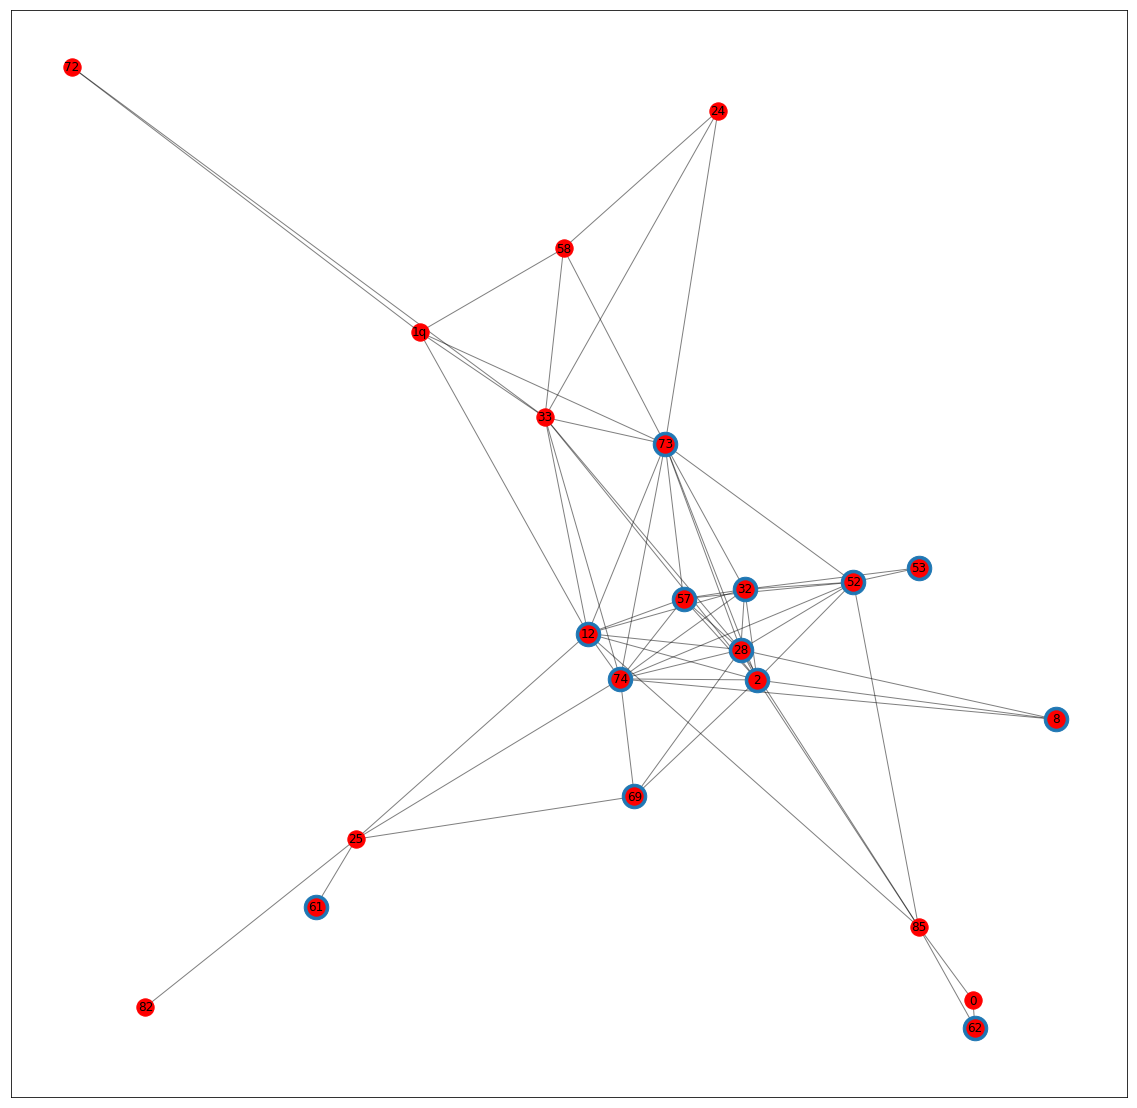

In [68]:
import numpy as np



for sub in nx.connected_component_subgraphs(NX):
    if len(sub.nodes())> 4:
        
        fig = plt.figure(figsize=(12,12)) 
        
        plt.tick_params(
        axis = 'both',
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False,
        labelleft=False,
        left=False
        
        )
        
        pos=nx.spring_layout(sub, weight='weight')
        #pos=nx.circular_layout(sub)
        
        print(pos)
        nx.draw_networkx_nodes(sub,nodelist=sub.nodes(),pos= pos , node_size= 300)
        nx.draw_networkx_edges(sub, edgelist=sub.edges(),pos = pos , width=1 ,alpha=.5 )
        nx.draw_networkx_labels(sub, nodelist=sub.nodes(), pos = pos , fontsize = 30)
        
        hap2nodes = set(pos.keys()).intersection(hap2)
        viralnodes = set(pos.keys()).intersection(viral)

        plt.scatter( [ pos[node][0] for node in hap2nodes ], [pos[node][1] for node in hap2nodes ] , s= 600, marker='o')
        
        plt.scatter( [ pos[node][0] for node in viralnodes ], [pos[node][1] for node in viralnodes ] , s= 900, marker='o')

        fig.set_figheight(20)
        fig.set_figwidth(20)
        
        
        plt.show()

        

In [ ]:
import pprint
import uniprot
seqids = "NP_000508.1  NP_001018081.3".split()

pairs = uniprot.batch_uniprot_id_mapping_pairs(
  'P_REFSEQ_AC', 'ACC', seqids)

pprint.pprint(pairs, indent=2)
